<a href="https://colab.research.google.com/github/GJ-007-sage/Astronomy/blob/main/3_body_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

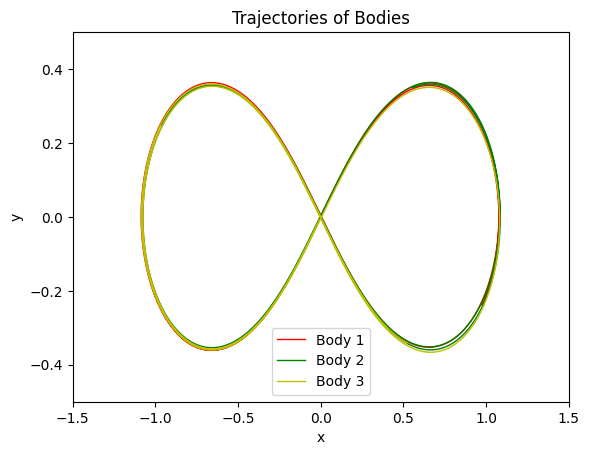

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the gravitational constant
G = 1.0

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.force = np.zeros(2, dtype=float)

    def update_position(self, dt):
        self.position += self.velocity * dt

    def update_velocity(self, dt):
        self.velocity += self.force / self.mass * dt

class ThreeBodySystem:
    def __init__(self, bodies):
        self.bodies = bodies

    def compute_forces(self):
        for body in self.bodies:
            body.force = np.zeros(2, dtype=float)
        for i, body1 in enumerate(self.bodies):
            for j, body2 in enumerate(self.bodies):
                if i != j:
                    r = body2.position - body1.position
                    distance = np.linalg.norm(r)
                    if distance != 0:
                        force_magnitude = G * body1.mass * body2.mass / distance**2
                        body1.force += force_magnitude * r / distance

    def update(self, dt):
        self.compute_forces()
        for body in self.bodies:
            body.update_velocity(dt)
            body.update_position(dt)

# Initializing bodies
body1 = Body(1.0, [0.97000436, -0.24308753], [0.93240737/2, 0.86473/2])
body2 = Body(1.0, [-0.97000436, 0.24308753], [0.93240737/2, 0.86473/2])
body3 = Body(1.0, [0.0, 0.0], [-0.93240737, -0.86473146])

system = ThreeBodySystem([body1, body2, body3])

def simulate(system, steps, dt):
    positions = []
    for _ in range(steps):
        system.update(dt)
        positions.append([body.position.copy() for body in system.bodies])
    return np.array(positions)

# Simulation parameters
steps = 1000
dt = 0.01
positions = simulate(system, steps, dt)

# Plotting trajectories
fig, ax = plt.subplots()
colors = ['r', 'g', 'y']
for i in range(3):
    ax.plot(positions[:, i, 0], positions[:, i, 1], color=colors[i], label=f'Body {i+1}', linewidth=1)
ax.set_title('Trajectories of Bodies')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 0.5)
ax.legend()
plt.savefig("three_body_trajectories.png")
plt.show()



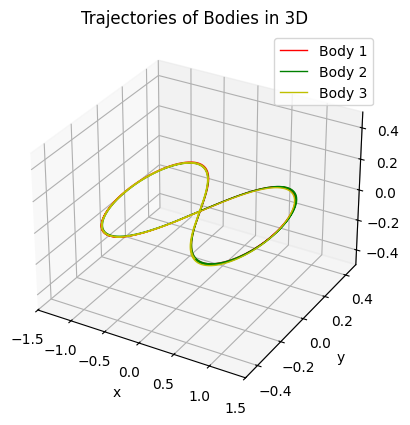

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the gravitational constant
G = 1.0

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.force = np.zeros(3, dtype=float)  # Update to 3D force

    def update_position(self, dt):
        self.position += self.velocity * dt

    def update_velocity(self, dt):
        self.velocity += self.force / self.mass * dt

class ThreeBodySystem:
    def __init__(self, bodies):
        self.bodies = bodies

    def compute_forces(self):
        for body in self.bodies:
            body.force = np.zeros(3, dtype=float)  # Update to 3D force
        for i, body1 in enumerate(self.bodies):
            for j, body2 in enumerate(self.bodies):
                if i != j:
                    r = body2.position - body1.position
                    distance = np.linalg.norm(r)
                    if distance != 0:
                        force_magnitude = G * body1.mass * body2.mass / distance**2
                        body1.force += force_magnitude * r / distance

    def update(self, dt):
        self.compute_forces()
        for body in self.bodies:
            body.update_velocity(dt)
            body.update_position(dt)

# Initializing bodies with 3D positions and velocities
body1 = Body(1.0, [0.97000436, -0.24308753, 0.0], [0.93240737/2, 0.86473/2, 0.0])
body2 = Body(1.0, [-0.97000436, 0.24308753, 0.0], [0.93240737/2, 0.86473/2, 0.0])
body3 = Body(1.0, [0.0, 0.0, 0.0], [-0.93240737, -0.86473146, 0.0])

system = ThreeBodySystem([body1, body2, body3])

def simulate(system, steps, dt):
    positions = []
    for _ in range(steps):
        system.update(dt)
        positions.append([body.position.copy() for body in system.bodies])
    return np.array(positions)

# Simulation parameters
steps = 1000
dt = 0.01
positions = simulate(system, steps, dt)

# Plotting 3D trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'y']
for i in range(3):
    ax.plot(positions[:, i, 0], positions[:, i, 1], positions[:, i, 2], color=colors[i], label=f'Body {i+1}', linewidth=1)

# Setting labels and title
ax.set_title('Trajectories of Bodies in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)  # Add z-axis limits

# Displaying the legend
ax.legend()

# Saving and showing the plot
plt.savefig("three_body_trajectories_3d.png")
plt.show()


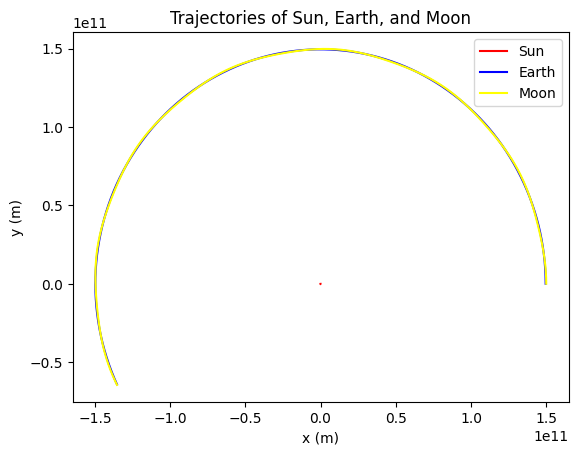

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the gravitational constant
G = 6.67430e-11  # in m^3 kg^-1 s^-2

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.force = np.zeros(2, dtype=float)

    def update_position(self, dt):
        self.position += self.velocity * dt

    def update_velocity(self, dt):
        self.velocity += self.force / self.mass * dt

class ThreeBodySystem:
    def __init__(self, bodies):
        self.bodies = bodies

    def compute_forces(self):
        for body in self.bodies:
            body.force = np.zeros(2, dtype=float)
        for i, body1 in enumerate(self.bodies):
            for j, body2 in enumerate(self.bodies):
                if i != j:
                    r = body2.position - body1.position
                    distance = np.linalg.norm(r)
                    if distance != 0:
                        force_magnitude = G * body1.mass * body2.mass / distance**2
                        body1.force += force_magnitude * r / distance

    def update(self, dt):
        self.compute_forces()
        for body in self.bodies:
            body.update_velocity(dt)
            body.update_position(dt)

# Initialize Earth-Moon-Sun system
mass_sun = 1.989e30      # in kg
mass_earth = 5.972e24    # in kg
mass_moon = 7.348e22     # in kg

# Approximate initial positions (in meters) and velocities (in meters/second)
position_sun = [0, 0]
velocity_sun = [0, 0]

position_earth = [1.496e11, 0]  # 1 AU from Sun
velocity_earth = [0, 29780]     # Earth's orbital speed

position_moon = [1.496e11 + 3.844e8, 0]  # Moon is ~384,400 km from Earth
velocity_moon = [0, 29780 + 1022]        # Moon's orbital speed relative to Earth

sun = Body(mass_sun, position_sun, velocity_sun)
earth = Body(mass_earth, position_earth, velocity_earth)
moon = Body(mass_moon, position_moon, velocity_moon)

system = ThreeBodySystem([sun, earth, moon])

def simulate(system, steps, dt):
    positions = []
    for _ in range(steps):
        system.update(dt)
        positions.append([body.position.copy() for body in system.bodies])
    return np.array(positions)

# Simulation parameters
steps = 5000
dt = 3600  # 1 hour in seconds
positions = simulate(system, steps, dt)

# Plotting trajectories
fig, ax = plt.subplots()
colors = ['red', 'blue', 'yellow']
labels = ['Sun', 'Earth', 'Moon']
for i in range(3):
    ax.plot(positions[:, i, 0], positions[:, i, 1], color=colors[i], label=labels[i])
ax.set_title('Trajectories of Sun, Earth, and Moon')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.legend()
plt.savefig("earth_moon_sun_trajectories.png")
plt.show()




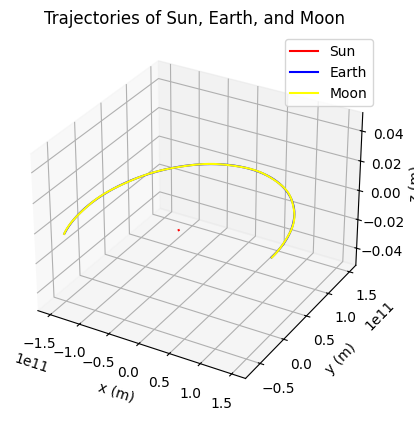

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting

# Define the gravitational constant
G = 6.67430e-11  # in m^3 kg^-1 s^-2

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)  # Using np.array for position
        self.velocity = np.array(velocity, dtype=float)  # Using np.array for velocity
        self.force = np.zeros(3, dtype=float)  # 3D force array

    def update_position(self, dt):
        self.position += self.velocity * dt

    def update_velocity(self, dt):
        self.velocity += self.force / self.mass * dt

class ThreeBodySystem:
    def __init__(self, bodies):
        self.bodies = bodies

    def compute_forces(self):
        for body in self.bodies:
            body.force = np.zeros(3, dtype=float)  # 3D force array
        for i, body1 in enumerate(self.bodies):
            for j, body2 in enumerate(self.bodies):
                if i != j:
                    r = body2.position - body1.position
                    distance = np.linalg.norm(r)
                    if distance != 0:
                        force_magnitude = G * body1.mass * body2.mass / distance**2
                        body1.force += force_magnitude * r / distance

    def update(self, dt):
        self.compute_forces()
        for body in self.bodies:
            body.update_velocity(dt)
            body.update_position(dt)

# Initialize Earth-Moon-Sun system
mass_sun = 1.989e30      # in kg
mass_earth = 5.972e24    # in kg
mass_moon = 7.348e22     # in kg

# Approximate initial positions (in meters) and velocities (in meters/second)
position_sun = [0, 0, 0]
velocity_sun = [0, 0, 0]

position_earth = [1.496e11, 0, 0]  # 1 AU from Sun
velocity_earth = [0, 29780, 0]     # Earth's orbital speed

position_moon = [1.496e11 + 3.844e8, 0, 0]  # Moon is ~384,400 km from Earth
velocity_moon = [0, 29780 + 1022, 0]        # Moon's orbital speed relative to Earth

# Create the bodies
sun = Body(mass_sun, position_sun, velocity_sun)
earth = Body(mass_earth, position_earth, velocity_earth)
moon = Body(mass_moon, position_moon, velocity_moon)

# Initialize the system
system = ThreeBodySystem([sun, earth, moon])

def simulate(system, steps, dt):
    positions = []
    for _ in range(steps):
        system.update(dt)
        positions.append([body.position.copy() for body in system.bodies])
    return np.array(positions)

# Simulation parameters
steps = 5000
dt = 3600  # 1 hour in seconds
positions = simulate(system, steps, dt)

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'yellow']
labels = ['Sun', 'Earth', 'Moon']

# Plotting the trajectories
for i in range(3):
    ax.plot(positions[:, i, 0], positions[:, i, 1], positions[:, i, 2], color=colors[i], label=labels[i])

# Setting labels and title
ax.set_title('Trajectories of Sun, Earth, and Moon')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')


# Displaying the legend
ax.legend()

# Saving and showing the plot
plt.savefig("earth_moon_sun_trajectories_3d.png")
plt.show()
